# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

>**Tip**: Though it's not a mandate, students can attempt the classroom quizzes to ensure statistical numeric values are calculated correctly in many cases.

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [3]:
df = pd.read_csv('ab_data.csv')
df.tail()

,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
total_users = np.shape(df)[0]
total_users

294478

**c.** The number of unique users in the dataset.

In [5]:
unique_users = df.user_id.nunique()
unique_users

290584

**d.** The proportion of users converted.

In [6]:
converted_prop = df.converted[df.converted ==1].count() / total_users
print('converted proportion of the total users is : ',converted_prop)

converted proportion of the total users is :  0.119659193556


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [43]:
df.user_id[(df.group =='treatment')&(df.landing_page !='new_page') ].count() 

1965

**f.** Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[((df.group=='control')&(df.landing_page=='old_page'))|((df.group=='treatment')&(df.landing_page=='new_page'))]

In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
df2.count()

user_id         290585
timestamp       290585
group           290585
landing_page    290585
converted       290585
dtype: int64

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
unique2_users = df2.user_id.nunique()
unique2_users

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# duplicated = df2.user_id.duplicated()
# index = [i for i, x in enumerate(duplicated) if x]
# duplicated[index]

df2.user_id[df2.duplicated(['user_id'], keep=False)]

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2[df2.duplicated(['user_id'], keep=False)].sort_values(by=['user_id'])

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop_duplicates(['user_id'])
# Check again if the row with a duplicate user_id is deleted or not
print('difference between total number of users and unique users :',df2.user_id.count() - df2.user_id.nunique())
print('since the difference between total number of users and unique users is zero then the duplicate was removed')

difference between total number of users and unique users : 0
since the difference between total number of users and unique users is zero then the duplicate was removed


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>

>**Tip**: The probability  you'll compute represents the overall "converted" success rate in the population and you may call it $p_{population}$.



In [16]:
print('total number of users :',df2.user_id.count())
df2.head()

total number of users : 290584


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
probability_converting = float(df2.query('converted == 1')['user_id'].nunique()) / df2.user_id.count()
probability_converting

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
control_converted = df2.user_id[(df2.group=='control')&(df2.converted==1)].count() / df2.user_id[df2.group=='control'].count()
print("The probability an individual converted ,given they were in a control group ",control_converted)

The probability an individual converted ,given they were in a control group  0.1203863045


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
treatment_converted = df2.user_id[(df2.group=='treatment')&(df2.converted==1)].count() / df2.user_id[df2.group=='treatment'].count()
print("The probability an individual converted ,given they were in a treatment group ",treatment_converted)

The probability an individual converted ,given they were in a treatment group  0.118808065515


In [20]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = control_converted - treatment_converted
obs_diff

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [21]:
new_page_prob = df2.user_id[df2.landing_page=="new_page"].count() / df2.user_id.count()
new_page_prob

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**as seen in b and c i calculated 2 metrics.The control which resembles the old page gave a very slim higher probability of conversion(but both conversions are very close with control giving:0.120 and treatment giving:0.118 probabilities for conversion), and in question d it indicates that ~50% of individuals will land on the new page therefore ~50% will land on old page thus no bias in page landing. So by looking at all the that there was no evidence that  the new treatment group users lead to more conversions.**

>**𝐻0--> P𝑜𝑙𝑑>=Pnew    
H1-->Pnew>Pold**

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
pnew = df2.user_id[df2.converted==1].count() / df2.user_id.count()
pnew

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
pold = df2.user_id[df2.converted==1].count() / df2.user_id.count()
pold

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [24]:
nnew = df2.user_id[df2.landing_page=='new_page'].count()
nnew

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
nold = df2.user_id[df2.landing_page=='old_page'].count() 
nold

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [26]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [27]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [28]:
diff_converted_prob = new_page_converted.mean() - old_page_converted.mean()
diff_converted_prob

0.00075224778888516308


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [29]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1],nnew, p=(pnew,1-pnew))
    old_page_converted = np.random.choice([0,1],nold, p=(pold,1-pold))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
p_diffs = np.array(p_diffs)    

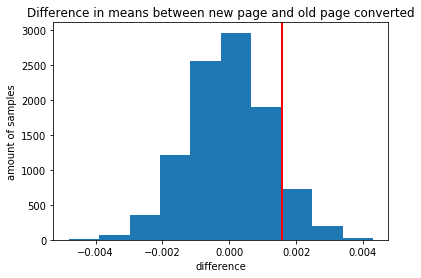

In [30]:
plt.hist(p_diffs)
plt.axvline(obs_diff,color='r', linewidth=2)
plt.title("Difference in means between new page and old page converted")
plt.xlabel('difference')
plt.ylabel('amount of samples');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [46]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
pVal = (p_diffs > obs_diff).mean()
pVal

0.90600000000000003

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**I have computed in question j the Pvalue,and since the Pvalue (0.906)is greater than type 1 error rate 0.05, therefore we fail to reject our null hypothesis, and as per our null hypothesis which has pnew=pold ,there was a difference between the conversian rates of the 2 **

In [47]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2.user_id[(df2.landing_page=='old_page')&(df2.converted==1)].count()

# number of conversions with the new_page
convert_new = df2.user_id[(df2.landing_page=='new_page')&(df2.converted==1)].count()

# number of individuals who were shown the old_page
n_old = df2.user_id[(df2.landing_page=='old_page')].count()

# number of individuals who received new_page
n_new = df2.user_id[(df2.landing_page=='new_page')].count()

In [48]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count = np.array([convert_new,convert_old])
nobs = np.array([n_new,n_old])
z_score, p_value = sm.stats.proportions_ztest(count,nobs, alternative = 'larger')
print(z_score, p_value)
# fail to reject null since |zscore|<za

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

>**since zscore is smaller than Za(1.645), and the Pvalue is greater than 0.05 (it is far bigger than what we obtained before but both are greater than 0.05) ,therefore we fail to reject the null hypothesis, which agrees with parts j & k indeed**

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Logistic regression since it is binary-->(conversion or no conversion)**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [49]:
df2['ab_page'] = pd.get_dummies(df2['group']) ['treatment']
df2["intercept"]=1
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [50]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [51]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:               8.077e-06
Time:                        12:09:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

>**Pvalue is = 0.190, the pvalue is more than alpha(0.05) therfore we fail to reject the null hypothesis,
Null-->treatment=control
alternative treatment!=control**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**it is a good idea to consider other factors get a sense of which are the main factors and which factors have the most influence on the decision of conversion, but on the otherhand, due adding additional terms into the regression model will make the interpretation of the results more complex, and also we'll need to check dependability of any factors on each other ,thereby leading to adding higher order terms as well **

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [52]:
# Read the countries.csv
dfCountries = pd.read_csv('countries.csv')

In [53]:
# Join with the df2 dataframe
df3 = df2.merge(dfCountries, on ='user_id', how='left')
df3.tail()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
290579,751197,2017-01-03 22:28:38.630509,control,old_page,0,0,1,US
290580,945152,2017-01-12 00:51:57.078372,control,old_page,0,0,1,US
290581,734608,2017-01-22 11:45:03.439544,control,old_page,0,0,1,US
290582,697314,2017-01-15 01:20:28.957438,control,old_page,0,0,1,US
290583,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1,UK


In [54]:
df3.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [55]:
# Create the necessary dummy variables
df3[['US', 'CA', 'UK']] = pd.get_dummies(df3['country'])
df3 = df3.drop(df3['CA'])
logitCountry = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK','US']])
result2 = logitCountry.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            3
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:               2.325e-05
Time:                        12:09:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1757
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.414      0.000      -2.004      -1.954
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK            -0.0099      0.013     -0.742      0.458      -0.036       0.016
US            -0.0506      0.028     -1.784      0.075      -0.106       0.005
==============================================================================
"""

**For each of the following interpretations we hold all other variables constant:**

**1-->for each unit increased in ab_page(new Page), a 1.5% conversion is lost(meaning for each unit using the old page the individuals are 1.5% more likely to convert)**

**2-->each unit increase in the UK reflects with a 0.99% decrease in the conversion rate**

**3-->each unit increase in the US reflects with a 5.06% decrease in the conversion rate**

In [56]:
# Fit your model, and summarize the results
df3['UK_ab_page'] = df3['ab_page']* df3['UK']
df3['US_ab_page'] = df3['ab_page']* df3['US']

logitFinal = sm.Logit(df3['converted'], df3[['intercept','ab_page','UK_ab_page','US_ab_page','UK','US']])
resultFinal = logitFinal.fit()
resultFinal.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290582
Model:                          Logit   Df Residuals:                   290576
Method:                           MLE   Df Model:                            5
Date:                Sun, 24 Apr 2022   Pseudo R-squ.:               3.484e-05
Time:                        12:09:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1917
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
UK_ab_page    -0.0314      0.027     -1.182      0.237      -0.084       0.021
US_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
UK             0.0058      0.019      0.307      0.759      -0.031       0.043
US            -0.0118      0.040     -0.296      0.767      -0.090       0.066
==============================================================================
"""

>**Only the intercept has statistical significance in predicting conversion when we look at Pvalue,so user's countries and the page and country combination don't have significance regarding the user's conversion rate** 
**1--->for every increase in unit in newPages conversion rate increases by 1.08%,holding all other variables constant**
**2-->conversion is 3.14% more likely to happen with NewPages in CA compared to NewPages in UK,holding all other variables constant **
**3-->conversion is 7.83% more likely to happen with NewPages in CA compared to NewPages in US,holding all other variables constant **
**4-->for every unit increase in UK users conversion rates increase by 0.58%,holding all other variables constant**
**5-->for every unit increase in US users conversion rates decrease by 1.18%,holding all other variables constant**

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0